## Trajectory Prediction by Interpolation

In [106]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer
from matplotlib import pyplot as plt

# Load the data
red_ball_fill = pd.read_csv('../test-data/red_ball_coordinates_128px_2024-02-27_15h51m.csv', delimiter=',', decimal='.')
red_ball_fill.shape

(1228, 14)

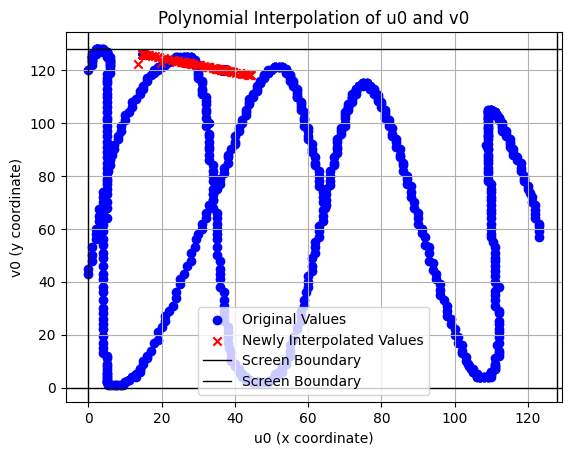

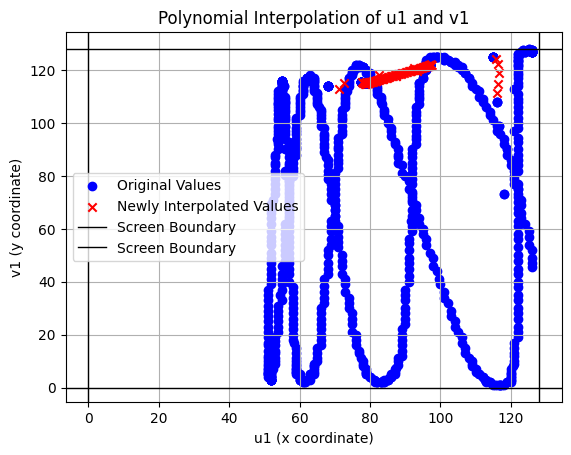

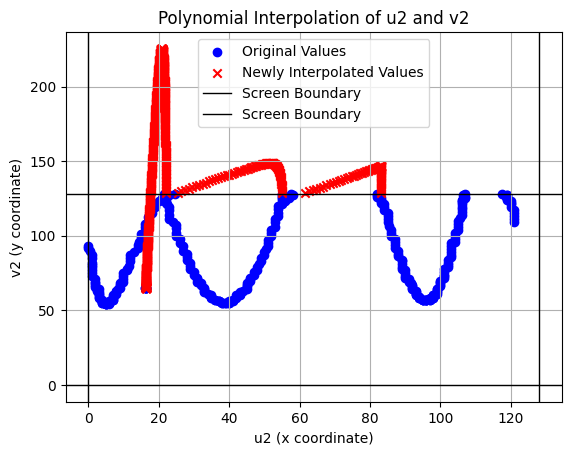

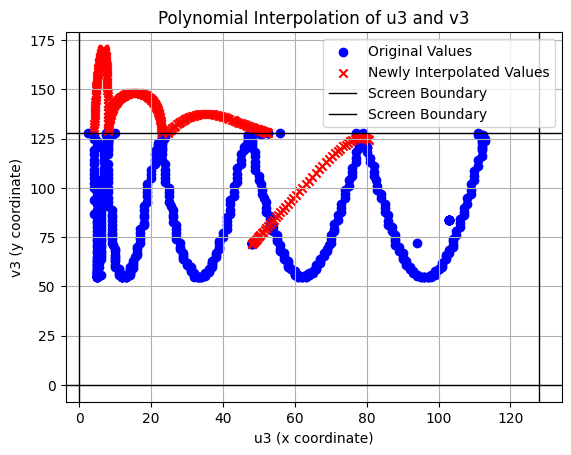

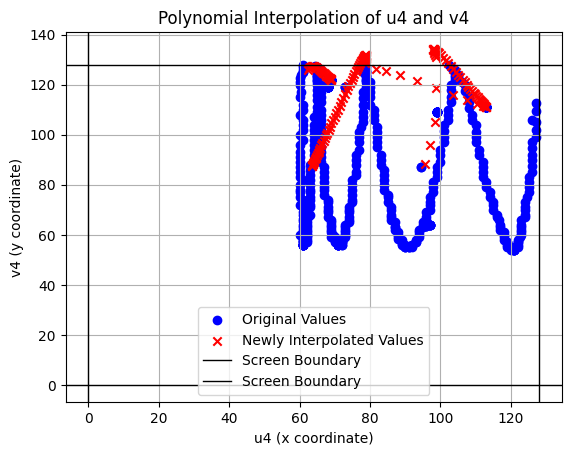

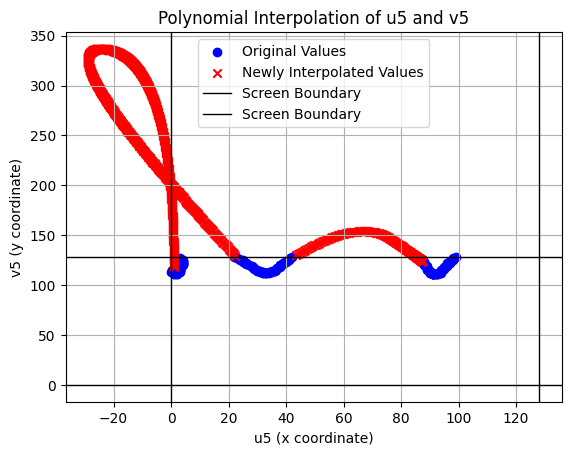

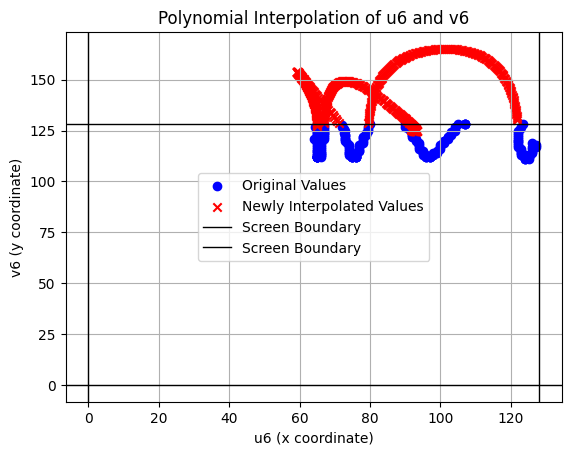

In [107]:

# Number of cameras
num_cameras = 7
result_df = red_ball_fill.copy()

# Loop through each pair of 'u' and 'v'
for i in range(num_cameras):
    col_u = f'u{i}'
    col_v = f'v{i}'

    # Extract the columns 'u' and 'v' for the current pair
    X_0 = red_ball_fill[[col_u, col_v]]

    # Create a copy to keep non-NaN rows
    X_0_copy = X_0.copy()

    X_0_nan = X_0_copy[X_0_copy.isna().any(axis=1)]

    # Drop NaN rows for z-score calculation
    X_0_non_nan = X_0.dropna()

    # Apply Isolation Forest to detect outliers
    model = IsolationForest(contamination=float(0.2), max_samples='auto')
    model.fit(X_0_non_nan)
    outliers_mask = model.predict(X_0_non_nan) == -1

    # Drop rows identified as outliers
    for index in X_0_copy.index:
        if index in X_0_non_nan.index[outliers_mask]:
            X_0_copy = X_0_copy.drop(index)

    # Interpolate missing values
    X_0_copy.interpolate(method='polynomial', order=2, inplace=True)

    # Fill NaN values in the original DataFrame with the interpolated values
    X_0_nan = X_0_nan.fillna(X_0_copy)

    # Apply KNNImputer
    imputer = KNNImputer(n_neighbors=5)
    X_0_copy = X_0_copy.to_numpy()
    X_0_copy = imputer.fit_transform(X_0_copy)

    # Convert X_0_copy back to a DataFrame
    X_0_copy = pd.DataFrame(X_0_copy, columns=[col_u, col_v])

    # Find the indices of NaN rows in the original DataFrame red_ball_fill
    nan_indices = X_0_nan.index
    result_df.loc[nan_indices, [col_u, col_v]] = X_0_copy[[col_u, col_v]]
    # Replace the corresponding rows in red_ball_fill with the imputed values from X_0_copy
    red_ball_fill.loc[nan_indices, [col_u, col_v]] = X_0_copy[[col_u, col_v]]

    # Plot the results for the current pair
    plt.scatter(X_0[col_u], X_0[col_v], c='blue', marker='o', label='Original Values')
    plt.scatter(X_0_nan[col_u], X_0_nan[col_v], c='red', marker='x', label='Newly Interpolated Values')

    # Add lines to represent the screen boundaries
    plt.axvline(x=128, color='black', linewidth=1, label='Screen Boundary')
    plt.axhline(y=128, color='black', linewidth=1)
    plt.axvline(x=0, color='black', linewidth=1, label='Screen Boundary')
    plt.axhline(y=0, color='black', linewidth=1)

    plt.title(f'Polynomial Interpolation of {col_u} and {col_v}')
    plt.xlabel(f'{col_u} (x coordinate)')
    plt.ylabel(f'{col_v} (y coordinate)')
    plt.legend()
    plt.grid(True)
    plt.show()


In [108]:
red_ball_fill.isna().sum()

u0      0
v0      0
u1     27
v1     27
u2     50
v2     50
u3    115
v3    115
u4    112
v4    112
u5     27
v5     27
u6     38
v6     38
dtype: int64

In [109]:
#result_df.to_csv('../interpolated-data/red_ball_coordinates_128px_024_interpolated.csv', index=False)

### Restructure the interpolation process
- Use Isolation Forest to detect all outliers so the interpolation works better
- Use Polynomial Interpolation to fill in the missing values
- Remove all the rows where the values are still NaN

In [110]:
red_ball_fill = pd.read_csv('../test-data/red_ball_coordinates_128px_2024-02-27_15h51m.csv', delimiter=',', decimal='.')
red_ball_fill.shape

(1228, 14)

NaN before interpolation: u0    181
v0    181
dtype: int64
NaN after interpolation: u0    0
v0    0
dtype: int64
(1228, 2)
(982, 2)


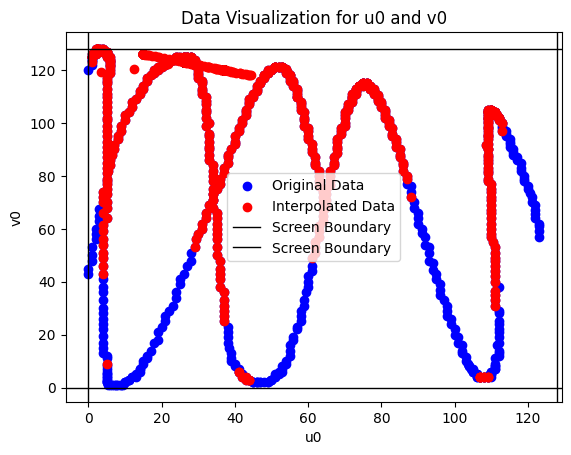

NaN before interpolation: u1    158
v1    158
dtype: int64
NaN after interpolation: u1    32
v1    32
dtype: int64
(1228, 2)
(982, 2)


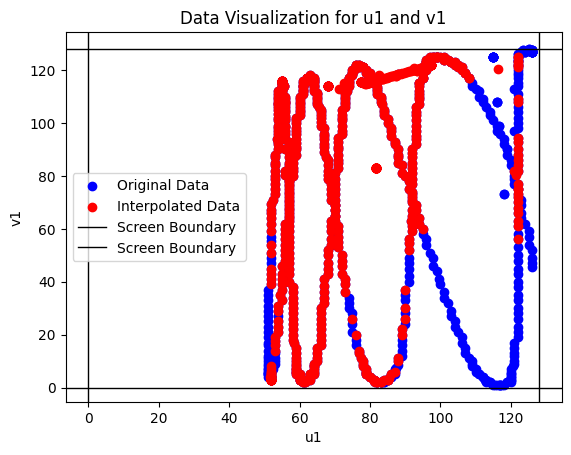

NaN before interpolation: u2    903
v2    903
dtype: int64
NaN after interpolation: u2    0
v2    0
dtype: int64
(1228, 2)
(982, 2)


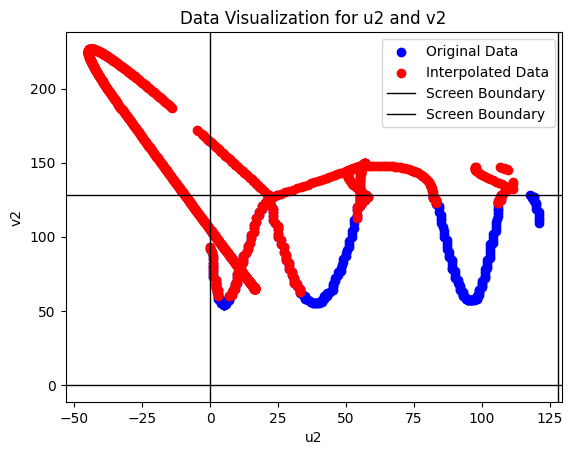

NaN before interpolation: u3    655
v3    655
dtype: int64
NaN after interpolation: u3    267
v3    267
dtype: int64
(1228, 2)
(982, 2)


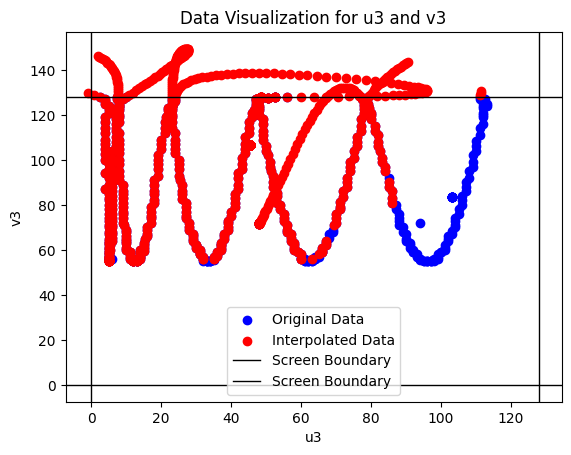

NaN before interpolation: u4    671
v4    671
dtype: int64
NaN after interpolation: u4    521
v4    521
dtype: int64
(1228, 2)
(982, 2)


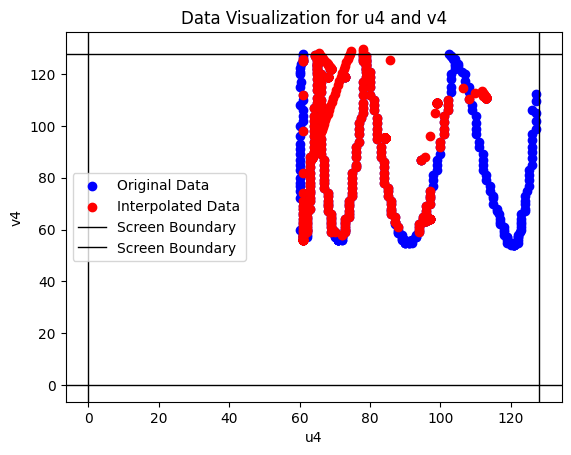

NaN before interpolation: u5    1095
v5    1095
dtype: int64
NaN after interpolation: u5    236
v5    236
dtype: int64
(1228, 2)
(982, 2)


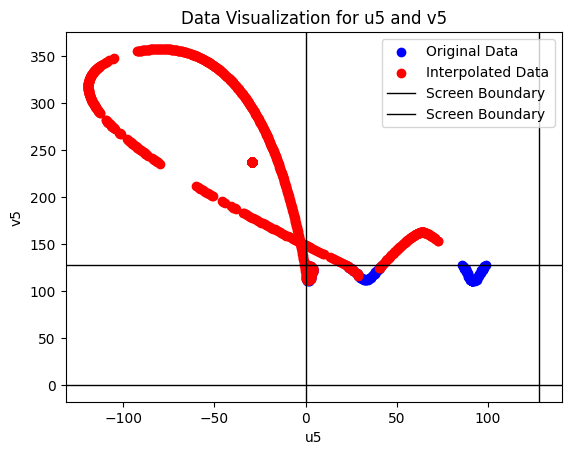

NaN before interpolation: u6    1040
v6    1040
dtype: int64
NaN after interpolation: u6    621
v6    621
dtype: int64
(1228, 2)
(982, 2)


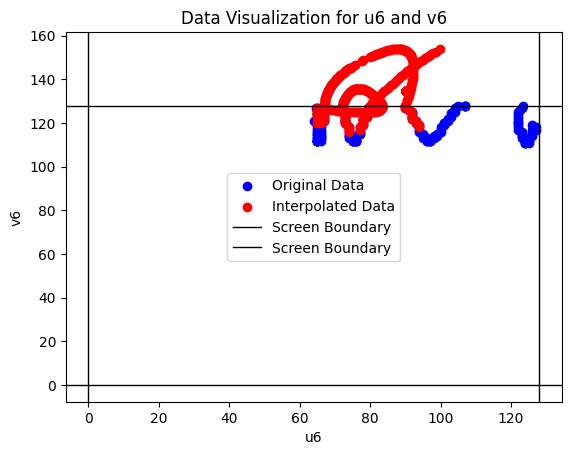

In [111]:

# Number of cameras
num_cameras = 7
result_df = red_ball_fill.copy()

# Loop through each pair of 'u' and 'v'
for i in range(num_cameras):
    col_u = f'u{i}'
    col_v = f'v{i}'

    # Extract the columns 'u' and 'v' for the current pair
    X_0 = red_ball_fill[[col_u, col_v]]
    X_0_original = X_0.copy()
    # do interpolation on the original data
    print(f'NaN before interpolation: {X_0_original.isna().sum()}')
    X_0_original = X_0_original.interpolate(method='polynomial', order=2)
    print(f'NaN after interpolation: {X_0_original.isna().sum()}')
    imputer_knn = KNNImputer(n_neighbors=5)
    X_0_original.to_numpy()
    X_0_original = imputer_knn.fit_transform(X_0_original)
    X_0_original = pd.DataFrame(X_0_original, columns=[col_u, col_v])
    # the outliers are removed from the data
    print(X_0_original.shape)
    model_iso = IsolationForest(contamination=0.2)
    model_iso.fit(X_0_original)
    outliers_mask = model_iso.predict(X_0_original) == -1
    X_0_original = X_0_original[~outliers_mask]
    print(X_0_original.shape)
    # Plot the original data in blue
    plt.scatter(X_0[col_u], X_0[col_v], color='blue', label='Original Data')
    
    # Plot the interpolated/red data in red
    plt.scatter(X_0_original[col_u], X_0_original[col_v], color='red', label='Interpolated Data')
    plt.axvline(x=128, color='black', linewidth=1, label='Screen Boundary')
    plt.axhline(y=128, color='black', linewidth=1)
    plt.axvline(x=0, color='black', linewidth=1, label='Screen Boundary')
    plt.axhline(y=0, color='black', linewidth=1)
    # Customize the plot
    plt.title(f'Data Visualization for {col_u} and {col_v}')
    plt.xlabel(col_u)
    plt.ylabel(col_v)
    plt.legend()
    
    # Show the plot
    plt.show()

#### Do Interpolation for X and Y coordinates separately

In [112]:
red_ball_fill = pd.read_csv('../test-data/red_ball_coordinates_128px_2024-02-27_15h51m.csv', delimiter=',', decimal='.')
red_ball_fill.shape

(1228, 14)